Julia Pawluś, Kamil Sarzyniak, Piotr Stawarski

In [1]:
def knapsack(weights, values, capacity):
    n = len(values)
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]

    # Wypełnianie tablicy DP
    for i in range(1, n + 1):
        for w in range(capacity + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]

    # Odtwarzanie wybranych przedmiotów
    w = capacity
    selected_items = []
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:
            selected_items.append(i - 1)  # dodajemy indeks przedmiotu
            w -= weights[i - 1]

    selected_items.reverse()  # zachowanie oryginalnej kolejności
    return dp[n][capacity], selected_items

In [2]:
import pandas as pd

data = pd.read_csv('knapsack_5_items.csv')

weights = data['Weights'].apply(lambda x: [int(i) for i in x.strip('[]').split()]).tolist()
values = data['Prices'].apply(lambda x: [int(i) for i in x.strip('[]').split()]).tolist()
capacity = data['Capacity'].tolist()


In [3]:
best_values = []
selected_items = []

for c in range(len(capacity)):
    best_values.append(0)
    selected_items.append([])
    best_values[c], selected_items[c] = knapsack(weights[c], values[c], capacity[c])


In [ ]:
# tabela 
tabela = []

for i in range(10):  
    wagi = weights[i]
    wartosci = values[i]
    poj = capacity[i]
    wart_alg = best_values[i]
    wart_best = data['Best price'][i]
    wybrane = selected_items[i]
    zgodnosc = "Tak" if wart_alg == wart_best else "Nie"

    tabela.append({
        'Nr': i + 1,
        'Wagi': wagi,
        'Wartości': wartosci,
        'Pojemność': poj,
        'Wartość algorytmu': wart_alg,
        'Best price': wart_best,
        'Wybrane przedmioty': wybrane,
        'Zgodność': zgodnosc
    })


tabela_df = pd.DataFrame(tabela)
print(tabela_df)


   Nr                  Wagi             Wartości  Pojemność  \
0   1  [46, 40, 42, 38, 10]  [12, 19, 19, 15, 8]         40   
1   2     [11, 31, 4, 6, 7]    [2, 8, 18, 16, 3]         64   
2   3  [32, 49, 27, 37, 24]   [19, 16, 16, 4, 1]         87   
3   4  [20, 35, 22, 23, 16]   [19, 17, 19, 9, 1]         21   
4   5   [7, 12, 19, 13, 20]  [10, 11, 18, 15, 5]         50   
5   6   [27, 10, 25, 25, 7]   [13, 19, 7, 16, 3]         66   
6   7   [21, 2, 33, 45, 26]   [1, 14, 10, 6, 13]         80   
7   8  [37, 27, 39, 14, 25]   [18, 7, 15, 4, 13]         35   
8   9    [1, 48, 4, 23, 39]   [9, 4, 10, 16, 12]         51   
9  10     [4, 3, 22, 9, 32]    [14, 6, 3, 17, 8]         53   

   Wartość algorytmu  Best price Wybrane przedmioty Zgodność  
0                 19        19.0                [1]      Tak  
1                 47        47.0    [0, 1, 2, 3, 4]      Tak  
2                 36        36.0          [0, 2, 4]      Tak  
3                 19        19.0                [0]   

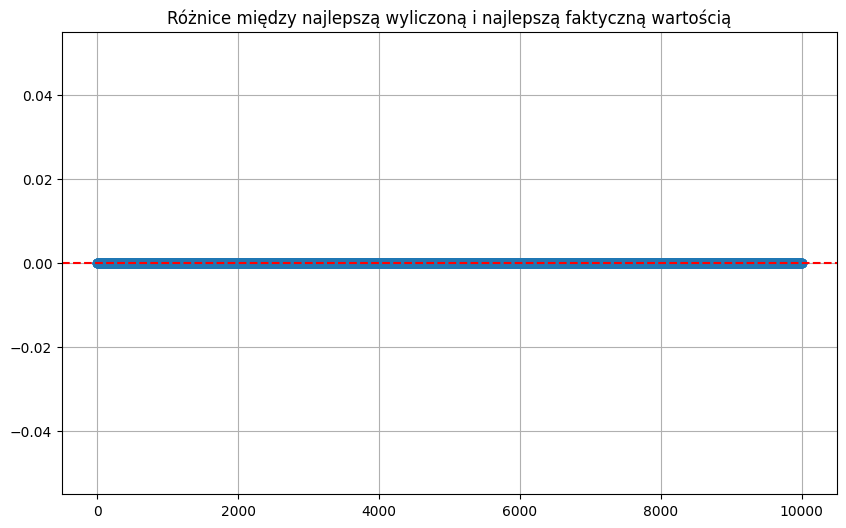

In [4]:
import matplotlib.pyplot as plt

differences = [best_values[i] - data['Best price'][i] for i in range(len(best_values))]

plt.figure(figsize=(10, 6))
plt.plot(range(len(differences)), differences, marker='o', linestyle='-')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Różnice między najlepszą wyliczoną i najlepszą faktyczną wartością')
plt.grid(True)
plt.show()
